# Create boxes to calculate fluxes and sums over

June, 2019

In [6]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
from pylab import *
import matplotlib
import warnings
import pickle
warnings.filterwarnings("ignore")

%matplotlib notebook

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Mask land values

In [20]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
tmask = tmask[0,:,1480:2050,180:800]
tmask_full_ave     = np.zeros((12, 50, 570, 620))
tmask_full_ave[:]  = tmask

Load the lons, lats, etc.

In [24]:
run_folder4= '/data/brogalla/run_storage/mn_test1f/'
monthly_ave  = 'ANHA12_EXH006_2002_monthly.nc'
monthly_diff = 'ANHA12_EXH006_2002_monthly_diff.nc'

In [25]:
ref   = nc.Dataset(run_folder4+monthly_ave)
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

### Boxes to create for interpretation at some point:
- Nares Strait
- McClure Strait (west side entrance of Parry Channel)
- Lancaster Sound (east side exit of Parry Channel)
- Baffin Island coast
- Peel Sound (west of Somerset Island)
- Jones Sound (between Devon & ellesmere island)
- Cape York
- Amundsen Gulf & Victoria strait
- Prince Regent inlet & Fury sound
- Sverdrup channel
- East vs. west separation of CAA

Nares Strait:

<IPython.core.display.Javascript object>


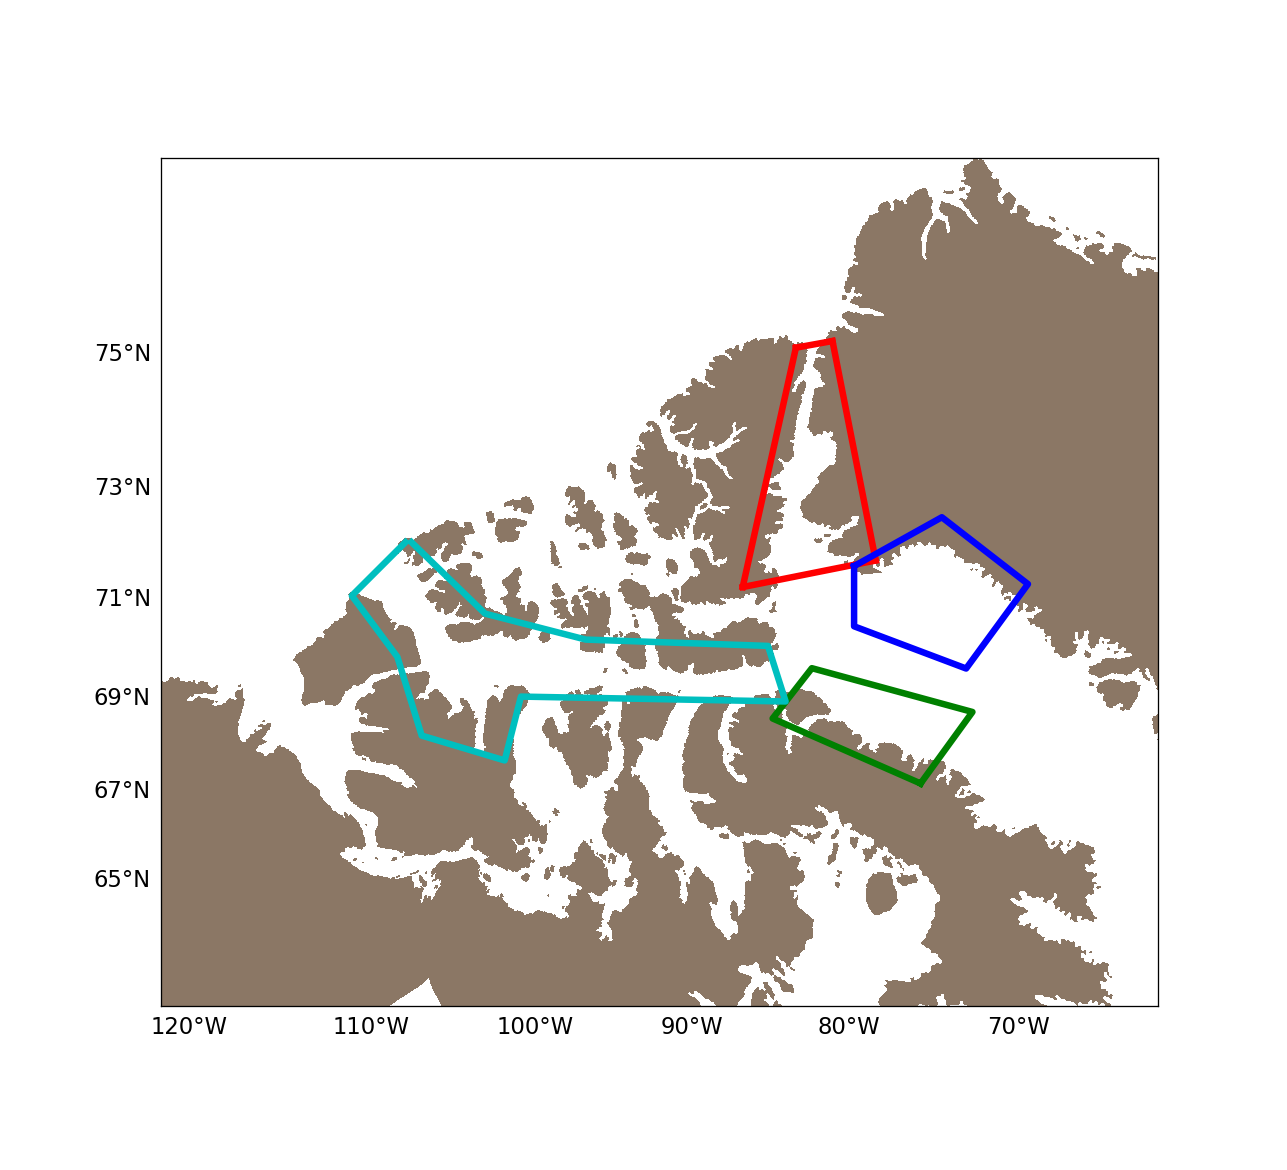

In [12]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)

#Nares Strait:
proj.plot([1.91e6, 2.02e6],[1.98e6, 2.00e6],'-r', linewidth=4) # upper boundary
proj.plot([1.75e6, 2.15e6],[1.26e6, 1.34e6],'-r', linewidth=4) # lower boundary
proj.plot([1.75e6, 1.91e6],[1.26e6, 1.98e6],'-r', linewidth=4) # left boundary
proj.plot([2.15e6, 2.02e6],[1.34e6, 2.00e6],'-r', linewidth=4) # right boundary

#Cape York / Greenland coast:
proj.plot([2.085e6, 2.085e6, 2.422e6, 2.608e6, 2.349e6, 2.085e6],\
          [1.323e6, 1.142e6, 1.015e6, 1.269e6, 1.470e6, 1.323e6],'-b', linewidth=4) 

#Baffin Island coast:
proj.plot([2.285e6, 2.441e6, 1.958e6, 1.84e6, 2.285e6],\
          [669259, 884313, 1.016e6, 864762, 669259],'-g', linewidth=4) 

#Parry Channel:
proj.plot([735676, 574385, 711238, 784551, 1.034e6, 1.083e6, 1.879e6, 1.826e6, 1.278e6, 975167, 753676],\
          [1.395e6, 1.234e6, 1.05e6, 813255, 738491, 930557, 915894, 1.083e6, 1.102e6, 1.18e6, 1.395e6], \
          '-c', linewidth=4) 

### Fluxes across boundaries of Archipelago:

<IPython.core.display.Javascript object>


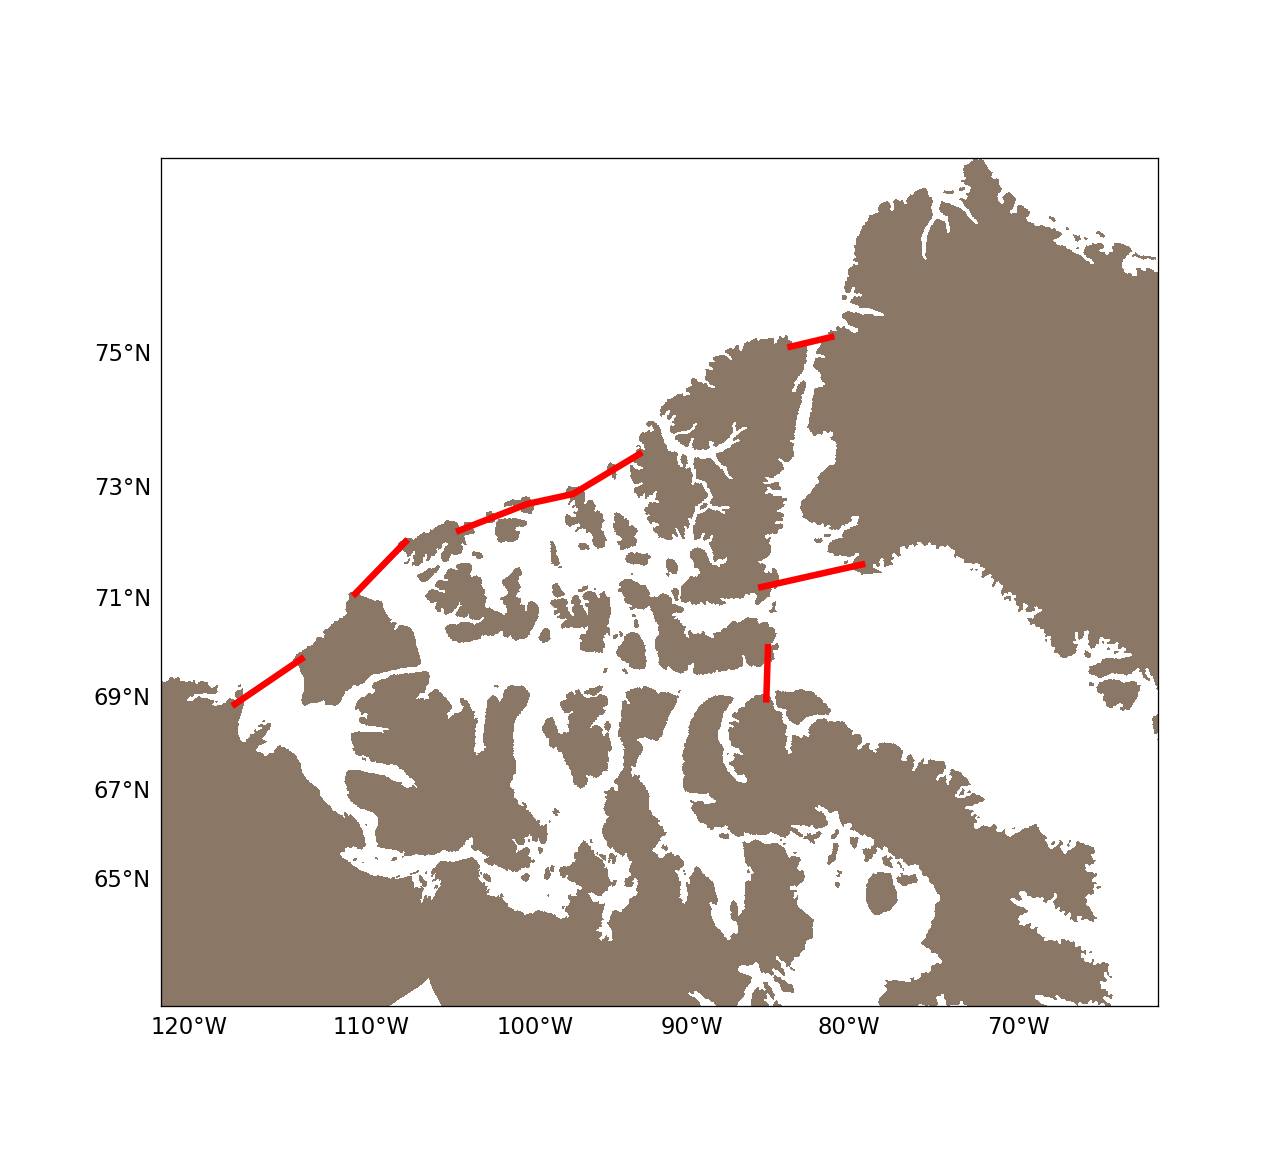

In [18]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)

#W Boundaries:
proj.plot([735676, 584385], [1.396e6, 1.240e6],'-r', linewidth=4) 
proj.plot([422870, 222479], [1.044e6, 907623],'-r', linewidth=4) 

#E Boundaries:
proj.plot([1.826e6, 1.821e6], [1.079e6, 922285],'-r', linewidth=4) 
proj.plot([1.806e6, 2.109e6], [1.26e6, 1.328e6],'-r', linewidth=4) 

# N boundaries:
proj.plot([1.894e6, 2.016e6], [1.983e6, 2.012e6],'-r', linewidth=4) 

# Northern CAA:
proj.plot([896966, 1.102e6, 1.24e6, 1.439e6], \
          [1.43e6, 1.51e6, 1.54e6, 1.66e6],'-r', linewidth=4) 

### West vs. East Archipelago:

<IPython.core.display.Javascript object>


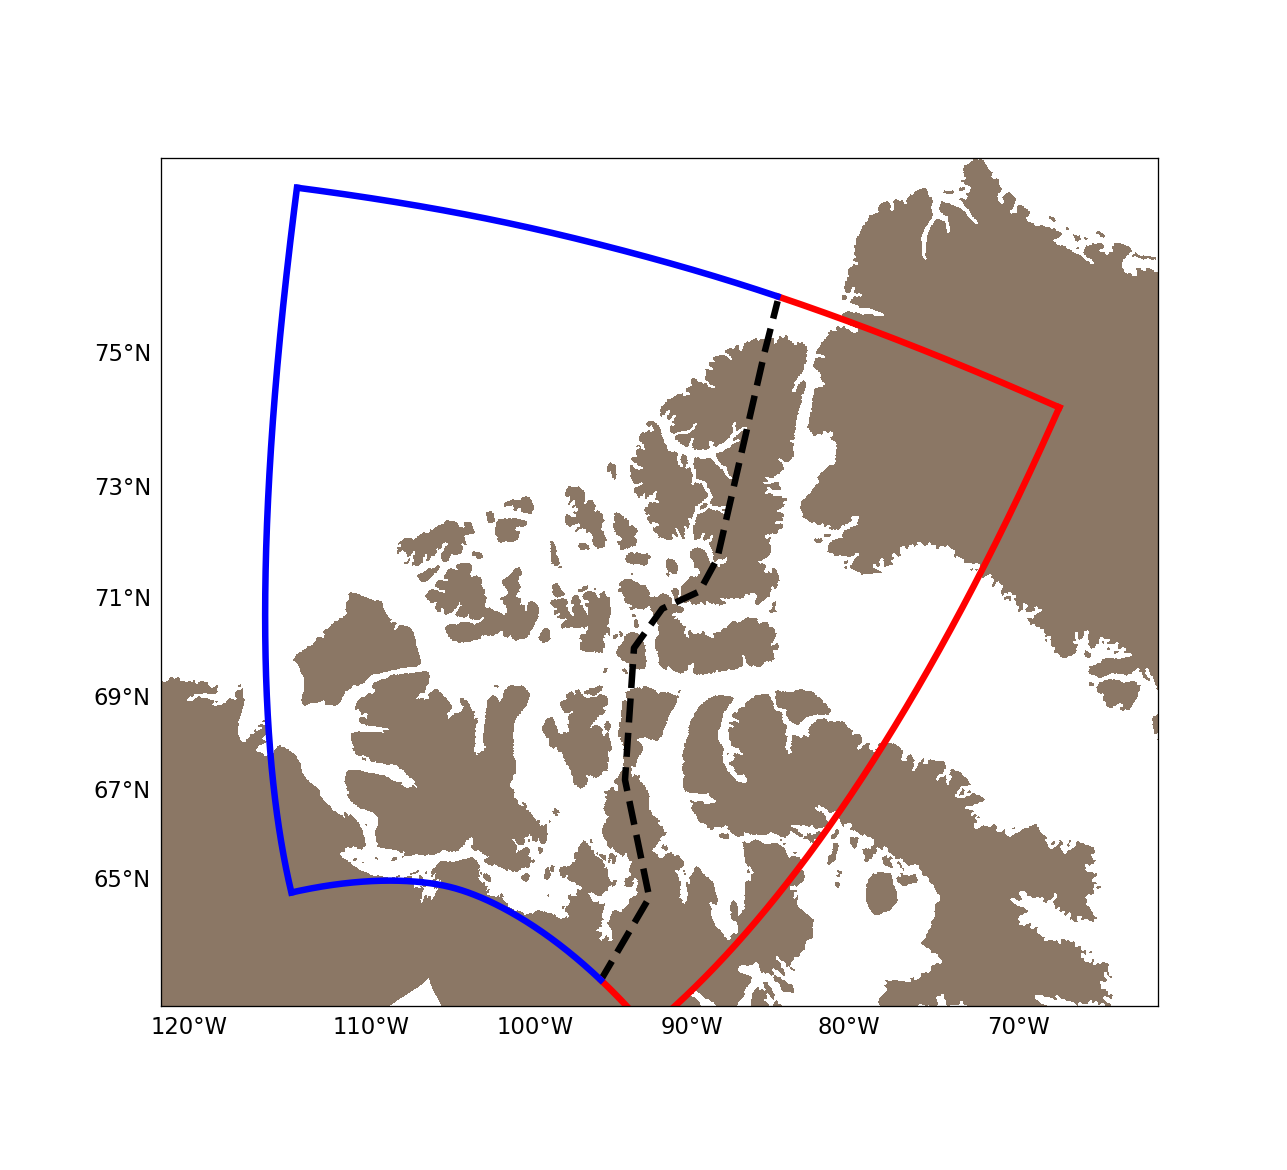

In [26]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)

#Boundary:
proj.plot([1.32e6, 1.469e6, 1.396e6, 1.423e6, 1.508e6, 1.62e6, 1.6733e6, 1.816e6, 1.855e6],\
          [72221, 326376, 680068, 1.0766e6, 1.195e6, 1.247e6, 1.345e6, 1.967e6, 2.12e6],'--k', linewidth=4) 

#East:
proj.plot(x[0:203,-1], y[0:203,-1],'-r', linewidth=4) 
proj.plot(x[0,:], y[0,:],'-r', linewidth=4) 
proj.plot(x[0:75,0], y[0:75,0],'-r', linewidth=4) 

#West:
proj.plot(x[203:-1,-1], y[203:-1,-1],'-b', linewidth=4) 
proj.plot(x[-1,:], y[-1,:],'-b', linewidth=4) 
proj.plot(x[75:-1,0], y[75:-1,0],'-b', linewidth=4) 